### MANE 4962 HW 3

  Lucas Zhou  662005044

# File Loaded

In [3]:
from google.colab import files
uploaded = files.upload()

Saving housing_prices.txt to housing_prices.txt
Saving HW3.1.jpg to HW3.1.jpg


# Problem 1:


Image segmentation is a process to highlight useful regions in images. Use the
skimage.io module to load the following image. Afterwards, segment the image into
multiple useful regions using the k-means clustering method. The segmented image
should highlight, for example, the dashboard, the driver’s arms, cars ahead etc., by
grouping similar pixels together. You do not need to split the data into train and test set
for this problem.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


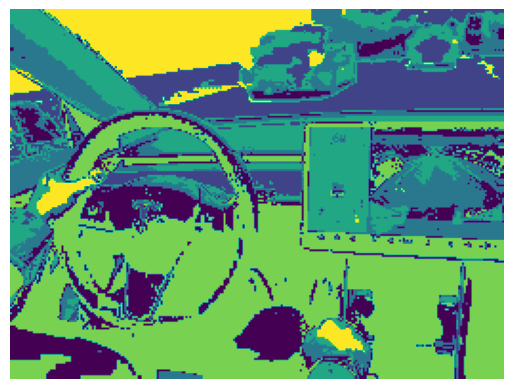

In [ ]:
from skimage.io import imread
from skimage.color import rgb2lab
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


# Load the image
image = imread('/content/HW3.1.jpg')

# Convert the image from RGB to Lab color space
image_lab = rgb2lab(image)

# Reshape the image to a 2D array of Lab color values
pixels = image_lab.reshape((-1, 3))

# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(pixels)
labels = kmeans.labels_

# Reshape labels back to the original image dimensions
segmented_image = labels.reshape(image.shape[0], image.shape[1])

# Display the segmented image
plt.imshow(segmented_image, cmap='viridis')
plt.axis('off')
plt.show()

# Problem 2:

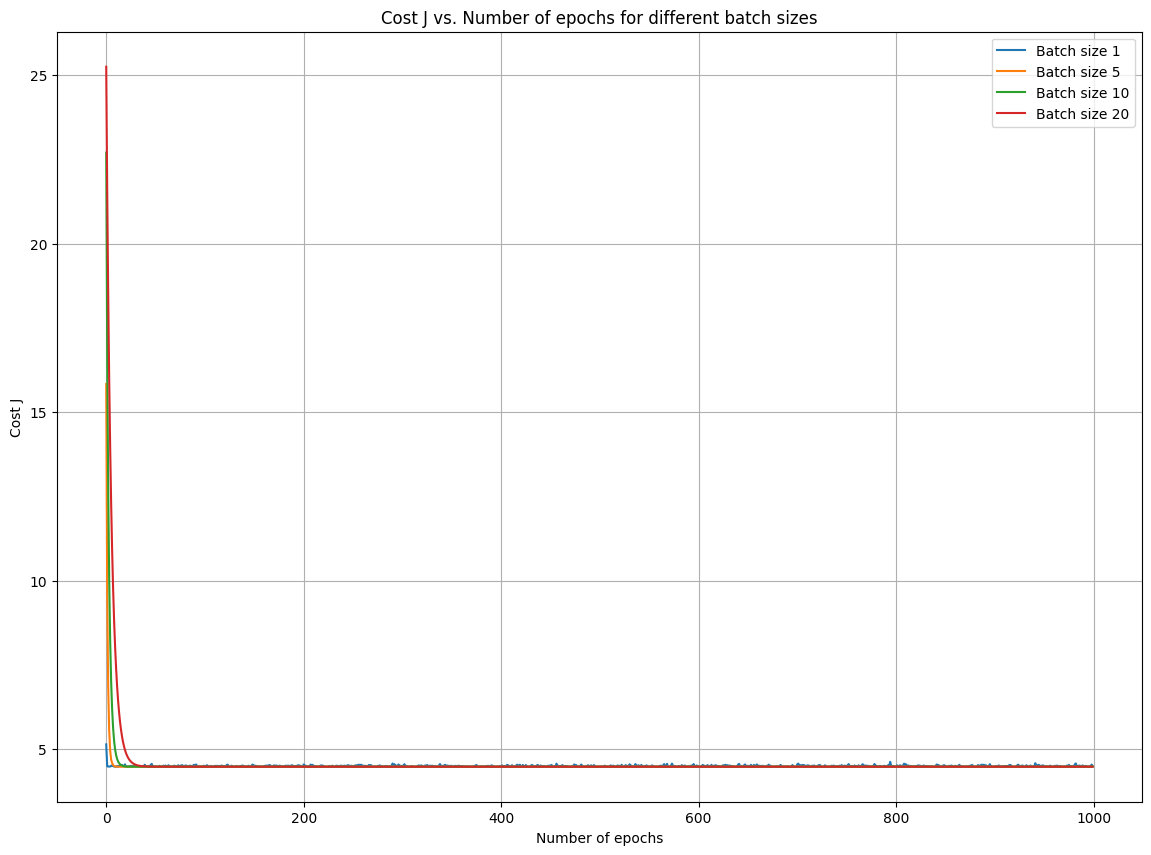

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_path = '/content/housing_prices.txt'
data = pd.read_csv(data_path, header=None, delimiter=',', skiprows=1)

# Extracting features (population) and target values (price)
X = data.iloc[:, 0].values  # Population
y = data.iloc[:, 1].values  # Housing price

# Normalize the features (population)
X_normalized = (X - np.mean(X)) / np.std(X)

# Adding a column of ones to the features to act as bias (intercept term)
X_b = np.c_[np.ones((len(X), 1)), X_normalized]

# Parameters for mini-batch gradient descent
learning_rate = 0.01
n_epochs = 1000
batch_sizes = [1, 5, 10, 20]
cost_history_batch = {}

# Mini-batch gradient descent function
def mini_batch_gradient_descent(X, y, learning_rate, batch_size, n_epochs):
    m = len(y)
    theta = np.random.randn(2, 1)  # Random initialization of weights
    cost_history = []

    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices].reshape(-1, 1)

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients

            y_predict = X_b.dot(theta)
            cost = (1/(2*m)) * np.sum(np.square(y_predict - y.reshape(-1, 1)))
        cost_history.append(cost)

    return theta, cost_history

# Plotting the cost function for each batch size
plt.figure(figsize=(14, 10))

for batch_size in batch_sizes:
    theta, cost_history = mini_batch_gradient_descent(X_b, y, learning_rate, batch_size, n_epochs)
    cost_history_batch[batch_size] = cost_history
    plt.plot(range(len(cost_history)), cost_history, label=f'Batch size {batch_size}')

plt.xlabel('Number of epochs')
plt.ylabel('Cost J')
plt.title('Cost J vs. Number of epochs for different batch sizes')
plt.legend()
plt.grid()
plt.show()



## With extra loop

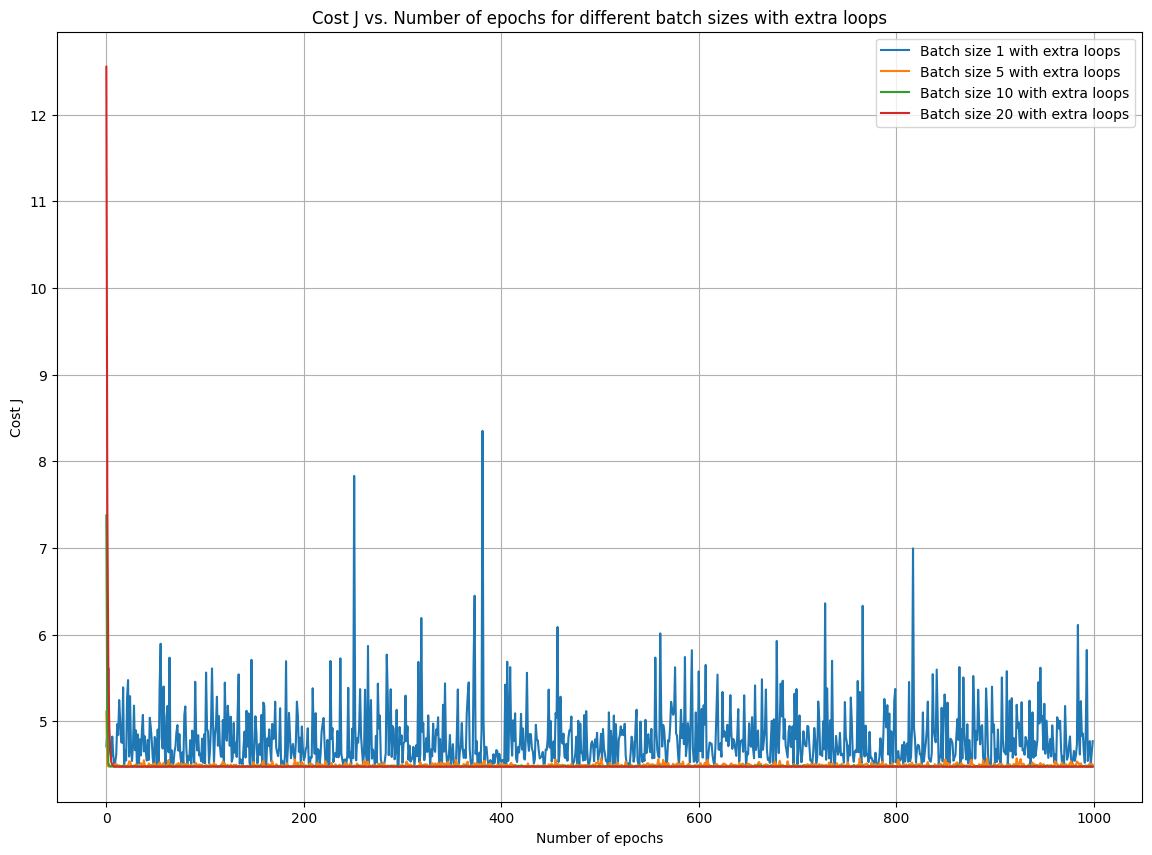

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_path = '/content/housing_prices.txt'
data = pd.read_csv(data_path, header=None, delimiter=',', skiprows=1)

# Extracting features (population) and target values (price)
X = data.iloc[:, 0].values  # Population
y = data.iloc[:, 1].values  # Housing price

# Normalize the features (population)
X_normalized = (X - np.mean(X)) / np.std(X)

# Adding a column of ones to the features to act as bias (intercept term)
X_b = np.c_[np.ones((len(X), 1)), X_normalized]

# Parameters for mini-batch gradient descent
learning_rate = 0.01
n_epochs = 1000
batch_sizes = [1, 5, 10, 20]
cost_history_batch = {}

# Mini-batch gradient descent function
def mini_batch_gradient_descent_with_extra_loop(X, y, learning_rate, batch_size, n_epochs, extra_loops):
    m = len(y)
    theta = np.random.randn(2, 1)  # Random initialization of weights
    cost_history = []

    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices].reshape(-1, 1)

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            for _ in range(extra_loops):  # Extra loop
                gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)
                theta = theta - learning_rate * gradients

            y_predict = X.dot(theta)
            cost = (1/(2*m)) * np.sum(np.square(y_predict - y.reshape(-1, 1)))
        cost_history.append(cost)

    return theta, cost_history

# Example usage
learning_rate = 0.01
n_epochs = 1000
batch_sizes = [1, 5, 10, 20]
extra_loops = 5  # Number of times the update step is repeated per batch
cost_history_batch = {}

plt.figure(figsize=(14, 10))

for batch_size in batch_sizes:
    theta, cost_history = mini_batch_gradient_descent_with_extra_loop(X_b, y, learning_rate, batch_size, n_epochs, extra_loops)
    cost_history_batch[batch_size] = cost_history
    plt.plot(range(len(cost_history)), cost_history, label=f'Batch size {batch_size} with extra loops')

plt.xlabel('Number of epochs')
plt.ylabel('Cost J')
plt.title('Cost J vs. Number of epochs for different batch sizes with extra loops')
plt.legend()
plt.grid()
plt.show()

# Problem 3:


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Load dataset
data = load_breast_cancer()

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)  # 70% training and 30% testing

# Create a logistic regression model
logreg = LogisticRegression()

# Recursive Feature Elimination for feature selection
rfe = RFE(logreg, n_features_to_select=2)
rfe = rfe.fit(X_train, y_train)

# Identify which two features are considered to be the most important.
selected_features = np.where(rfe.support_ == True)[0]
print("Selected features:", selected_features)

# Retrain the model with the selected features
logreg.fit(X_train[:, selected_features], y_train)

# Predict test set
y_pred = logreg.predict(X_test[:, selected_features])

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected features: [11 26]
Confusion Matrix:
 [[ 42  21]
 [  6 102]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.67      0.76        63
           1       0.83      0.94      0.88       108

    accuracy                           0.84       171
   macro avg       0.85      0.81      0.82       171
weighted avg       0.85      0.84      0.84       171

Accuracy Score: 0.8421052631578947


# Problem 4:

Epoch 1/100
3/3 [==============================] - 1s 183ms/step - loss: 61.8107 - val_loss: 48.9762
Epoch 2/100
3/3 [==============================] - 0s 42ms/step - loss: 54.0265 - val_loss: 40.2932
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 43.6392 - val_loss: 30.7408
Epoch 4/100
3/3 [==============================] - 0s 28ms/step - loss: 32.1063 - val_loss: 16.4625
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 15.4819 - val_loss: 12.8520
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 10.6462 - val_loss: 16.6331
Epoch 7/100
3/3 [==============================] - 0s 30ms/step - loss: 9.6925 - val_loss: 11.6862
Epoch 8/100
3/3 [==============================] - 0s 42ms/step - loss: 8.2531 - val_loss: 11.6372
Epoch 9/100
3/3 [==============================] - 0s 38ms/step - loss: 8.1725 - val_loss: 11.5187
Epoch 10/100
3/3 [==============================] - 0s 67ms/step - loss: 8.1572 - val_loss: 11.5903
Ep

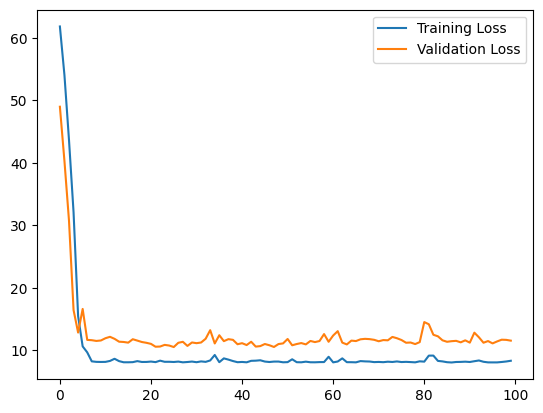

1/1 [==============================] - 0s 83ms/step
Predicted price of house: [[16.034851]]
1/1 [==============================] - 0s 21ms/step
Root Mean Squared Error on Validation Set: 3.400657


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and prepare the dataset
data = pd.read_csv('/content/housing_prices.txt')
X = data.iloc[:, 0].values.reshape(-1, 1)  # Features
y = data.iloc[:, 1].values.reshape(-1, 1)  # Labels

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

# Compile the network
model.compile(optimizer='sgd', loss='mse')

# Train the network
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Predict the price of a house in a city with population of 165,000 (scaled accordingly)
population_165k_scaled = scaler.transform([[16.5]])  # The population feature scaled
predicted_price = model.predict(population_165k_scaled)
print("Predicted price of house:", predicted_price)

# Calculate a regression metric (Root Mean Squared Error, for example)
y_pred = model.predict(X_val)
mse = tf.keras.losses.MeanSquaredError()
rmse = np.sqrt(mse(y_val, y_pred).numpy())
print("Root Mean Squared Error on Validation Set:", rmse)
